In [16]:
# 사용되는 라이브러리
import os # Operating System 
import numpy as np # Numerical Python: 수학 연산
from scipy import stats # Statistics
import pandas as pd # DataFrame 처리
import matplotlib.pyplot as plt # MATLAB Graph
import seaborn as sns # MATLAB Graph
import geopandas as gpd # Spatial Data 처리
from scipy.stats import pearsonr # 피어슨 상관분석

# 소수점 이하 4자리까지 표시
pd.options.display.float_format = '{:.4f}'.format

In [33]:
# 패키지 추가 설치 필요
import statsmodels.api as sm

In [3]:
# 현재 작업 디렉토리 확인
os.getcwd()

# 새로운 작업 디렉토리로 변경
# os.chdir("/path/to/your/new/directory")

'c:\\Users\\GEO00\\Desktop\\GEO_TOUR_2024'

In [4]:
# 현재 작업 디렉토리의 파일 목록 확인
os.listdir()

['3-1.Data.ipynb',
 '3-2.Random Forest and XAI.ipynb',
 'Income.csv',
 'kallikraths_Income.dbf',
 'kallikraths_Income.prj',
 'kallikraths_Income.sbn',
 'kallikraths_Income.sbx',
 'kallikraths_Income.shp',
 'kallikraths_Income.shp.xml',
 'kallikraths_Income.shx']

In [18]:
# 입력자료 불러오기
df = pd.read_csv('Income.csv')
df

,X,Y,UnemrT01,PrSect01,Foreig01,Income01
0,616259.0078,4551127.2411,5.2213,21.8179,1.9968,10969.3153
1,644783.1356,4561364.0355,2.1542,92.9124,0.0383,6398.6415
2,602100.9505,4555689.1377,6.0624,70.2068,1.3400,6608.8975
3,633712.4684,4539548.4898,7.4219,57.7481,0.8902,6700.3753
4,517831.1952,4572544.4784,10.8511,7.2988,2.9616,11299.1065
...,...,...,...,...,...,...
320,507562.9646,3855767.6568,0.3500,51.3514,9.8765,8498.0803
321,475420.5821,3905917.9493,2.2846,61.5258,14.6802,7989.9584
322,465887.9907,3920086.9471,5.1913,45.7012,7.9163,8750.0301
323,484468.9696,3924050.7531,5.9384,51.3057,8.8894,8120.0271


<AxesSubplot:>

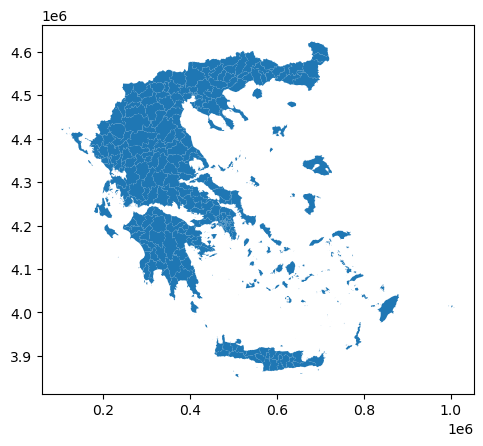

In [19]:
gdf = gpd.read_file('kallikraths_Income.shp')
gdf
gdf.plot()

# 입력자료 기초통계 및 시각화

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         325 non-null    float64
 1   Y         325 non-null    float64
 2   UnemrT01  325 non-null    float64
 3   PrSect01  325 non-null    float64
 4   Foreig01  325 non-null    float64
 5   Income01  325 non-null    float64
dtypes: float64(6)
memory usage: 15.4 KB


In [21]:
# 입력자료 기술통계량
df.describe()
# df.describe().transpose()

,X,Y,UnemrT01,PrSect01,Foreig01,Income01
count,325.0000,325.0000,325.0000,325.0000,325.0000,325.0000
mean,449209.5339,4262771.8939,6.0074,26.1333,6.4710,10475.5195
std,143734.7951,181592.0255,2.8822,19.9689,4.0172,2943.2967
min,142498.4242,3855767.6568,0.3500,0.2786,0.0383,5421.7339
25%,345429.3072,4162918.5884,4.3185,7.0391,3.4812,8615.2508
50%,455782.9529,4221560.8364,5.6297,24.9500,5.9350,9911.5095
75%,517480.1875,4399004.5904,6.9847,42.5862,8.4698,11755.1636
max,1001577.7127,4606754.2186,19.6875,92.9124,24.5336,24573.8945


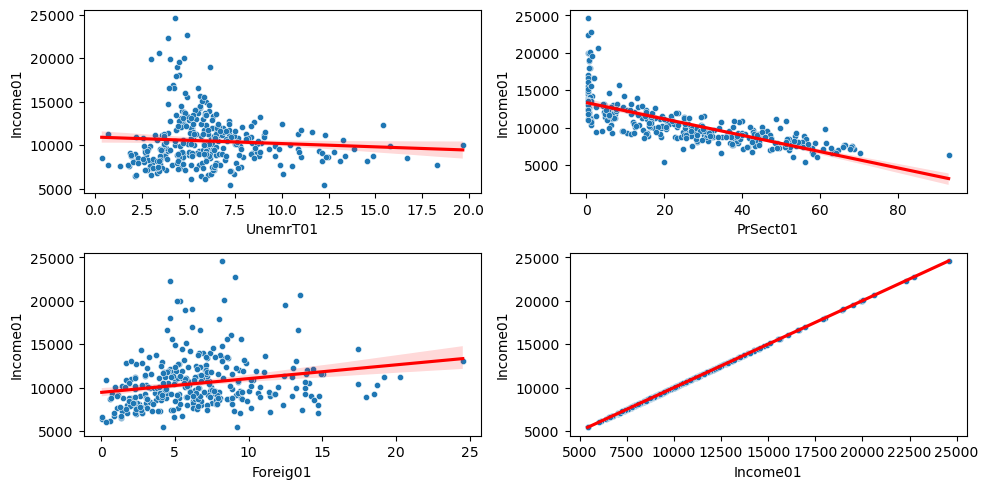

In [22]:

# Income(종속변수)와의 산점도 그리기
def scatter_with_trend(df):
    columns = df.columns.tolist()  # 데이터프레임의 모든 컬럼 가져오기
    columns.remove('X') # 좌표 컬럼 제외하기
    columns.remove('Y') # 좌표 컬럼 제외하기
    
    num_rows = 2
    num_cols = 2
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5))  # subplot 생성
    
    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols
        
        # 산점도 그리기
        sns.scatterplot(data=df, x=column, y='Income01', ax=axs[row, col], s=20)
        
        # 추세선 그리기
        sns.regplot(data=df, x=column, y='Income01', scatter=False, color='red', ax=axs[row, col])  
        
        axs[row, col].set_xlabel(column)
    
    plt.tight_layout()  # subplot 간격 조정
    plt.show()

scatter_with_trend(df)

In [23]:

def plot_qq(df):
    df = df[['UnemrT01', 'PrSect01', 'Foreig01', 'Income01']] # 좌표 컬럼 제외
    num_cols = len(df.columns)
    rows = math.ceil(num_cols)
    fig, ax = plt.subplots(nrows=rows, ncols=4, figsize=(15, 3*rows))
    colors = np.random.choice(list(sns.xkcd_rgb.values()), num_cols, replace=False)
    
    # 각 컬럼에 대해 QQ plot을 그립니다.
    for i, col in enumerate(df.columns):
        # 해당 컬럼의 데이터를 가져옵니다.
        data = df[col].dropna()
        
        # QQ plot을 그립니다.
        stats.probplot(data, dist="norm", plot=ax[i//4, i%4])
        ax[i//4, i%4].set_title(f"QQ plot of {col}", fontsize=12)
        ax[i//4, i%4].set_xlabel("Theoretical quantiles", fontsize=10)
        ax[i//4, i%4].set_ylabel("Ordered values", fontsize=10)
        ax[i//4, i%4].tick_params(axis='both', which='major', labelsize=9)
        ax[i//4, i%4].grid(True)
        ax[i//4, i%4].spines['right'].set_visible(False)
        ax[i//4, i%4].spines['top'].set_visible(False)
        ax[i//4, i%4].spines['bottom'].set_linewidth(0.5)
        ax[i//4, i%4].spines['left'].set_linewidth(0.5)
        ax[i//4, i%4].spines['bottom'].set_color(colors[i])
        ax[i//4, i%4].spines['left'].set_color(colors[i])
        
        # 특정 조건에 따라 추가적인 subplot에 그림을 그립니다.
        if col == '특정컬럼이름':
            # 예시: 추가적인 subplot에 히스토그램 그리기
            ax2 = ax[i//4, i%4].twinx()
            sns.histplot(data, bins=20, kde=False, color='red', ax=ax2)
            ax2.set_ylabel('Frequency', color='red')
            ax2.tick_params(axis='y', labelcolor='red')

    # 남은 subplot 제거
    for i in range(num_cols, rows*4):
        fig.delaxes(ax[i//4, i%4])
        
    plt.tight_layout()
    plt.show()
    
plot_qq(df)

NameError: name 'math' is not defined

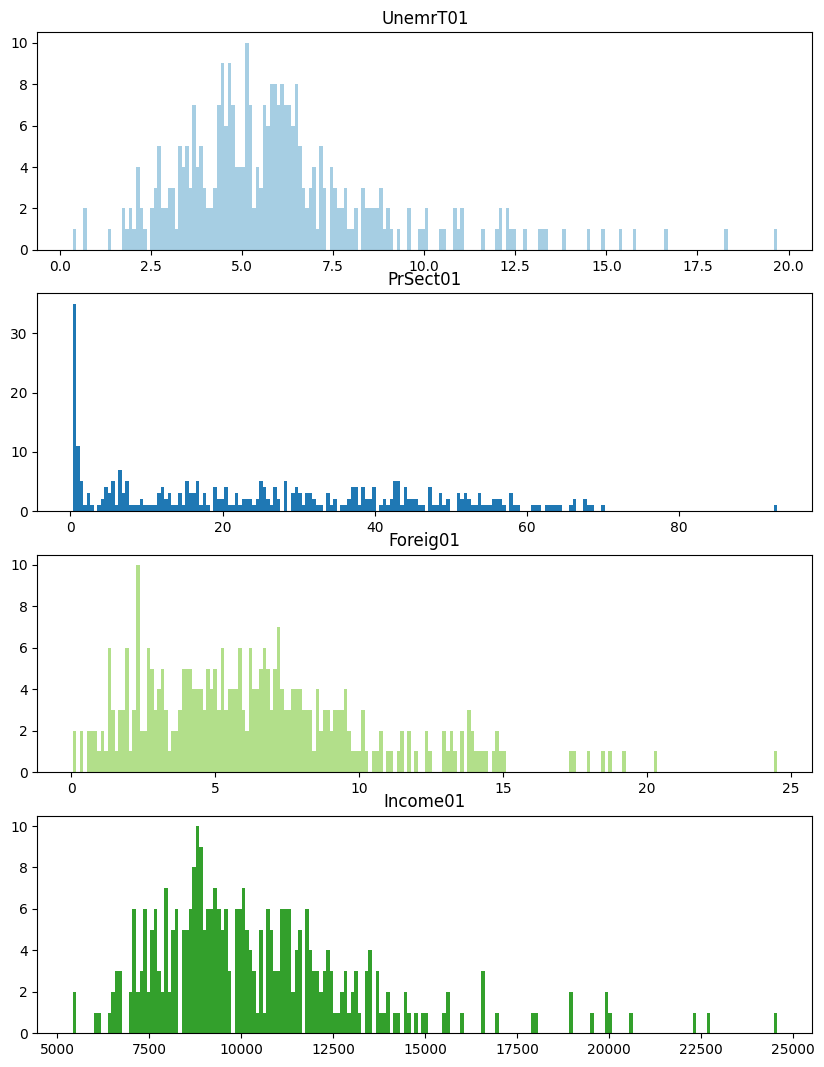

In [ ]:
# 각 컬럼 별로 히스토그램 출력
def plot_histograms(df):
    df = df[['UnemrT01', 'PrSect01', 'Foreig01', 'Income01']] # 좌표 컬럼 제외    
    fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10,13))
    
    for i, column in enumerate(df.columns):
        colors = sns.color_palette("Paired", len(df.columns))
        axes[i].hist(df[column], bins=200, color=colors[i % len(df.columns)])  # i를 colors 리스트의 인덱스로 사용하여 색상을 지정
        axes[i].set_title(column)
    
    plt.show()
plot_histograms(df)

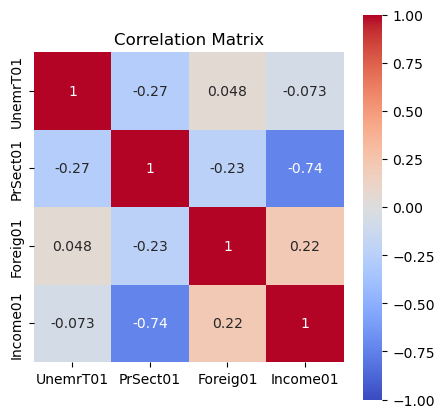

In [24]:
# 상관계수 행렬 매트릭스 시각화
def correlation_heatmap(df):
    df = df[['UnemrT01', 'PrSect01', 'Foreig01', 'Income01']] # 좌표 컬럼 제외        
    corr = df.corr() # 데이터프레임의 상관계수 행렬 계산
    fig, ax = plt.subplots(figsize=(5,5)) # 그래프 크기 설정
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, ax=ax) # heatmap 출력
    plt.title('Correlation Matrix')
    plt.show()
correlation_heatmap(df)

In [25]:
# 상관계수의 p값 확인
p_values = pd.DataFrame()  # 전역 변수로 선언

def correlation_pvalue(df):
    global p_values  # 전역 변수로 선언

    corr = df.corr()  # 데이터프레임의 상관계수 행렬 계산

    for col1 in corr.columns:
        p_values[col1] = np.nan  # NaN 값으로 초기화

    for i, col1 in enumerate(corr.columns):
        for col2 in corr.columns[i:]:
            if col1 != col2:  # 동일한 특성 간의 상관 계수는 1이므로 계산할 필요가 없습니다.
                corr_val, p_val = pearsonr(df[col1], df[col2])  # 피어슨 상관 계수 및 p-값 계산
                p_values.at[col1, col2] = p_val  # 대칭 행렬로 p-값 저장
                p_values.at[col2, col1] = p_val  # 대칭 행렬로 p-값 저장

    # 결과 표시
    with pd.option_context('display.float_format', '{:.4f}'.format):
        print("P-values for correlation coefficients:")
        
correlation_pvalue(df)
pd.DataFrame(p_values['Income01']).sort_values('Income01') 

P-values for correlation coefficients:


,Income01
PrSect01,0.0000
Foreig01,0.0001
Y,0.0237
X,0.0479
UnemrT01,0.1865
Income01,NaN


# 최소제곱회귀모델

In [34]:
# 독립변수 
X = df[['UnemrT01', 'PrSect01', 'Foreig01']]

# 종속변수
Y = df['Income01']

In [35]:
# 독립변수에 상수항(Const) 추가
X = sm.add_constant(X)
X

,const,UnemrT01,PrSect01,Foreig01
0,1.0000,5.2213,21.8179,1.9968
1,1.0000,2.1542,92.9124,0.0383
2,1.0000,6.0624,70.2068,1.3400
3,1.0000,7.4219,57.7481,0.8902
4,1.0000,10.8511,7.2988,2.9616
...,...,...,...,...
320,1.0000,0.3500,51.3514,9.8765
321,1.0000,2.2846,61.5258,14.6802
322,1.0000,5.1913,45.7012,7.9163
323,1.0000,5.9384,51.3057,8.8894


In [36]:
# OLS 선형회귀모델 생성
ols = sm.OLS(Y, X).fit()

In [37]:
# OLS 결과 확인
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:               Income01   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     181.2
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           9.87e-69
Time:                        10:36:27   Log-Likelihood:                -2895.5
No. Observations:                 325   AIC:                             5799.
Df Residuals:                     321   BIC:                             5814.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.517e+04    362.371     41.863      0.0